In [1]:
# Import all necessary libraries
import pandas as pd
print('Pandas version: ', pd.__version__)

import numpy as np
print('NumPy version: ', np.__version__)

import matplotlib
print('Matplotlib version: ', matplotlib.__version__)

from matplotlib import pyplot as plt

import sklearn
print('Scikit-Learn version: ', sklearn.__version__)

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.cluster import KMeans


import pickle
print('Pickle version: ', pickle.format_version)

import sys
print('Sys version: ', sys.version[0:5])

from sys import exc_info

import ast

Pandas version:  1.5.0
NumPy version:  1.23.4
Matplotlib version:  3.6.1
Scikit-Learn version:  1.1.2
Pickle version:  4.0
Sys version:  3.8.1


In [2]:
# Define carts : a ticket contains one or more libelles
carts = pd.read_csv('KaDo.part', usecols = ['TICKET_ID', 'LIBELLE'])
print('Shape of carts dataset is: ',carts.shape, '\n')
print('Number of different tickets is:', len(carts["TICKET_ID"].value_counts()))
carts.T
carts.to_csv('all_carts.csv')

Shape of carts dataset is:  (211909, 2) 

Number of different tickets is: 87159


In [3]:
# Get a list of all unique tickets
tickets = np.unique(carts['TICKET_ID'])

In [4]:
# Encode libelles so we can use them in our algorithms 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(carts['LIBELLE'])
print('Number of items is:', len(le.classes_))

libelle_encoded = le.transform(carts['LIBELLE'])
carts['LIBELLE_ENCODED'] = libelle_encoded

# Save encoded libelles into csv file
carts_encoded = carts.drop(['LIBELLE'], axis=1)
carts_encoded.to_csv('all_carts_encoded.csv')

Number of items is: 1260


In [5]:
# Get a list of strings
# Each string corresponds to the items that are in the ticket (=cart)
def itemsListForTickets(tickets, tickets_data):
    tickets_items_list = []
    for ticket in tickets:
        tickets_items_list.append(str(list(tickets_data[tickets_data['TICKET_ID'] == ticket]['LIBELLE_ENCODED'])).split('[')[1].split(']')[0])
    return tickets_items_list

In [6]:
# Apply fonction using list of unique tickers and the carts_endoded df
tickets_items_list = itemsListForTickets(tickets, carts_encoded)
print('Items list for', len(carts), ' tickets')
print('A list of first 10 tickets bought items: \n', tickets_items_list[:10]) 

Items list for 211909  tickets
A list of first 10 tickets bought items: 
 ['810', '303, 631, 119', '1220, 956, 1202', '402, 746', '87, 86', '304, 303', '702', '165', '859, 49, 1023', '568']


In [7]:
# Vectorize each string and return all vectors and feature names
def prepSparseMatrix(list_of_str):
    cv = CountVectorizer(token_pattern = r'[^\,\ ]+', lowercase = False)
    sparseMatrix = cv.fit_transform(list_of_str)
    return sparseMatrix.toarray(), cv.get_feature_names_out()

In [8]:
sparseMatrix, feature_names = prepSparseMatrix(tickets_items_list)

In [9]:
# For each ticket, 0 if item is not in the cart, 1 if items is not in the cart
df_sparseMatrix = pd.DataFrame(sparseMatrix, index = tickets, columns = feature_names)
df_sparseMatrix

,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
32931667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32931668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32931717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32931724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32931728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36529734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36529798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36529800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36529803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Verification step : makek sure 0 and 1 are correctly distributed 
# in the sparse matrix according to the first 6 tickets initial DF
first_6_tickets_SM = carts_encoded[carts_encoded['TICKET_ID'].isin(tickets[:6])].sort_values('TICKET_ID')
print(first_6_tickets_SM.T)
print(df_sparseMatrix.loc[np.unique(first_6_tickets_SM['TICKET_ID']), list(map(str, np.unique(first_6_tickets_SM['LIBELLE_ENCODED'])))])

                   165279    142361    142362    142363    77315     77316   \
TICKET_ID        32931667  32931668  32931668  32931668  32931717  32931717   
LIBELLE_ENCODED       810       303       631       119      1220       956   

                   77317     12153     12154     131555    131556    131345  \
TICKET_ID        32931717  32931724  32931724  32931728  32931728  32931739   
LIBELLE_ENCODED      1202       402       746        87        86       304   

                   131346  
TICKET_ID        32931739  
LIBELLE_ENCODED       303  
          86  87  119  303  304  402  631  746  810  956  1202  1220
32931667   0   0    0    0    0    0    0    0    1    0     0     0
32931668   0   0    1    1    0    0    1    0    0    0     0     0
32931717   0   0    0    0    0    0    0    0    0    1     1     1
32931724   0   0    0    0    0    1    0    1    0    0     0     0
32931728   1   1    0    0    0    0    0    0    0    0     0     0
32931739   0   0    0    1

In [11]:
# Use elbow method to define the optimized K
# WCSS = Within Clusters Sum of Squares
class elbowMethod():
    def __init__(self, sparseMatrix):
        self.sparseMatrix = sparseMatrix
        self.wcss = list()
        self.differences = list()
    def run(self, init, upto, max_iterations = 300):
        for i in range(init, upto + 1):
            kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = max_iterations, n_init = 10, random_state = 0)
            kmeans.fit(sparseMatrix)
            self.wcss.append(kmeans.inertia_)
        self.differences = list()
        for i in range(len(self.wcss)-1):
            self.differences.append(self.wcss[i] - self.wcss[i+1])
    def showPlot(self, boundary = 500, upto_cluster = None):
        if upto_cluster is None:
            WCSS = self.wcss
            DIFF = self.differences
        else:
            WCSS = self.wcss[:upto_cluster]
            DIFF = self.differences[:upto_cluster - 1]
        plt.figure(figsize=(15, 6))
        plt.subplot(121).set_title('Elbow Method Graph')
        plt.plot(range(1, len(WCSS) + 1), WCSS)
        plt.grid(b = True)
        plt.subplot(122).set_title('Differences in Each Two Consective Clusters')
        len_differences = len(DIFF)
        X_differences = range(1, len_differences + 1)
        plt.plot(X_differences, DIFF)
        plt.plot(X_differences, np.ones(len_differences)*boundary, 'r')
        plt.plot(X_differences, np.ones(len_differences)*(-boundary), 'r')
        plt.grid()
        plt.show()

/tmp/ipykernel_397/3841504368.py:26: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True)


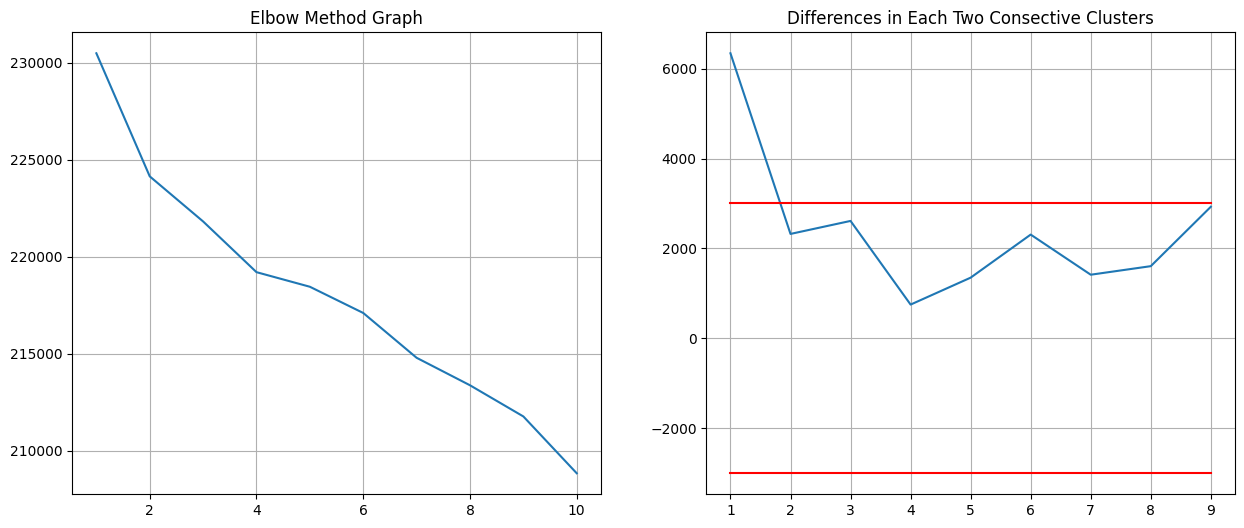

In [12]:
# Instantiate elbowMethod with our SM
elbow_method = elbowMethod(sparseMatrix) 
# Test SM with several K
elbow_method.run(1, 10)
elbow_method.showPlot(boundary = 3000)

/tmp/ipykernel_397/3841504368.py:26: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True)


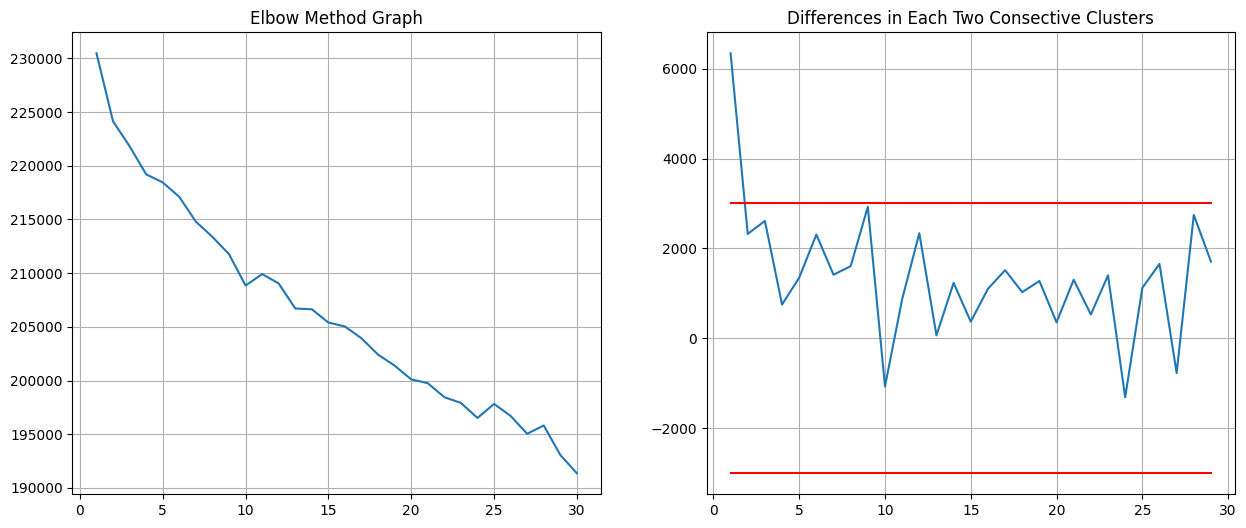

In [13]:
elbow_method.run(11, 30)
elbow_method.showPlot(boundary = 3000)

In [14]:
# Fitting Data on Model
kmeans = KMeans(n_clusters=8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(sparseMatrix)

In [15]:
# Display each ticket and its corresponding cluster
tickets_cluster = pd.DataFrame(np.concatenate((tickets.reshape(-1,1), clusters.reshape(-1,1)), axis = 1), columns = ['TICKET_ID', 'Cluster'])
tickets_cluster.T

,0,1,2,3,4,5,6,7,8,9,...,87149,87150,87151,87152,87153,87154,87155,87156,87157,87158
TICKET_ID,32931667,32931668,32931717,32931724,32931728,32931739,32931754,32931761,32931789,32931805,...,36529019,36529023,36529042,36529703,36529707,36529734,36529798,36529800,36529803,36529864
Cluster,1,1,1,7,1,1,1,1,1,4,...,1,1,2,1,7,1,1,1,1,1


In [16]:
# For each cluster, how many times do we find each libelle
def clustersLibelles(tickets_cluster, tickets_data):
    clusters = list(tickets_cluster['Cluster'])
    each_cluster_libelles = list()
    for i in range(len(np.unique(clusters))):
        tickets_list = list(tickets_cluster[tickets_cluster['Cluster'] == i]['TICKET_ID'])
        tickets_libelles_list = list()
        for ticket in tickets_list:    
            tickets_libelles_list.extend(list(tickets_data[tickets_data['TICKET_ID'] == ticket]['LIBELLE_ENCODED']))
        tickets_libelles_counts = list()
        tickets_libelles_counts.extend([[libelle, tickets_libelles_list.count(libelle)] for libelle in np.unique(tickets_libelles_list)])
        each_cluster_libelles.append(pd.DataFrame(tickets_libelles_counts, columns=['LIBELLE_ENCODED', 'Count']).sort_values(by = ['Count'], ascending = False).reset_index(drop=True))
    return each_cluster_libelles

cluster_libelles = clustersLibelles(tickets_cluster, carts)

In [131]:
# For cluster 1, libelle [LIBELLE_ENCODED] is present [Count] times
cluster_libelles[1].T

,0,1,2,3,4,5,6,7,8,9,...,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239
LIBELLE_ENCODED,779,597,1099,7,281,729,596,595,594,125,...,557,561,562,567,569,1200,650,651,728,1259
Count,2160,1865,1753,1733,1652,1646,1638,1417,1404,1329,...,1,1,1,1,1,1,1,1,1,1


In [18]:
# How many different tickets are in each cluster ?
# Also check that the sum of the nb of tickets in each cluster == the total number of tickets at start
total_nb_tickets = 0
for i in range(8):
    len_tickets = tickets_cluster[tickets_cluster['Cluster'] == i].shape[0]
    total_nb_tickets += len_tickets
    print('Tickets in Cluster ' + str(i) + ' -> ', len_tickets) 
print(f"Total number of tickets : {total_nb_tickets}")

Tickets in Cluster 0 ->  1232
Tickets in Cluster 1 ->  70750
Tickets in Cluster 2 ->  5875
Tickets in Cluster 3 ->  2289
Tickets in Cluster 4 ->  1976
Tickets in Cluster 5 ->  2127
Tickets in Cluster 6 ->  1531
Tickets in Cluster 7 ->  1379
Total number of tickets : 87159


In [36]:
# Get all the tickets belonging to a certain client (by his id)
tickets_of_clients = pd.read_csv('KaDo.part', usecols = ['TICKET_ID', 'CLI_ID'])

def tickets_of_a_client(client_id):
    tickets_df = tickets_of_clients[tickets_of_clients['CLI_ID'] == client_id]
    return tickets_df['TICKET_ID'].unique()    
    
analyzed_client_tickets = tickets_of_a_client(941958669)
analyzed_client_tickets

array([32946317, 33182830, 33577174, 34015044, 34398198, 34665272,
       35017400, 35221068, 35546515])

In [125]:
# Get all the clusters of a specific client thanks to his former tickets
def clusters_of_a_client(tickets):
    client_clusters = list()
    for ticket_id in tickets:
        current_cluster = tickets_cluster[tickets_cluster['TICKET_ID'] == ticket_id]['Cluster'].values[0];
        if current_cluster not in client_clusters:
            client_clusters.append(current_cluster)
    return client_clusters

analyzed_client_clusters = clusters_of_a_client(analyzed_client_tickets)
analyzed_client_clusters

[1, 3]

In [133]:
def bought_items(tickets):
    bought_items = list()
    for ticket_id in tickets:
        libelles_serie = df_sparseMatrix.loc[ticket_id]
        for item_id in list(libelles_serie[libelles_serie==1].index):
            bought_items.append(item_id)
    return bought_items
            
analyzed_client_bought_items = bought_items(analyzed_client_tickets)
analyzed_client_bought_items

['155',
 '745',
 '137',
 '1099',
 '490',
 '745',
 '424',
 '17',
 '783',
 '1058',
 '29',
 '745',
 '1058',
 '1126']

In [136]:
def items_contained_in_clusters(clusters):
    items_contained_in_clusters = list()
    for cluster in clusters:
        print(cluster_libelles[cluster][cluster_libelles[cluster]['Count'] > 500])
items_contained_in_clusters(analyzed_client_clusters)

    LIBELLE_ENCODED  Count
0               779   2160
1               597   1865
2              1099   1753
3                 7   1733
4               281   1652
5               729   1646
6               596   1638
7               595   1417
8               594   1404
9               125   1329
10             1088   1225
11              121   1223
12              298   1181
13              845   1120
14              123   1084
15              155   1008
16              598    990
17             1097    936
18              600    935
19              906    924
20              601    905
21              599    877
22             1023    828
23             1018    774
24              124    768
25              238    759
26              261    755
27             1017    751
28              303    737
29              272    720
30              623    698
31              708    690
32              702    689
33              692    684
34              304    678
35              271    645
3

In [23]:
all = pd.read_csv('KaDo.part')
all

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281.0
1,35592159,10,1.66,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 PAMPLEMOUSSE FL 200ML,1490281.0
2,35592159,10,7.45,SOINS DU VISAGE,VIS_CJOUR Jeunes Specifique,VIS_JEUNE_ET_LEVRE,CR JR PARF BIO.SPE AC.SENT.50ML,1490281.0
3,35592159,10,5.95,SOINS DU VISAGE,VIS_DEMAQ AAAR,VIS_AAAR_DEMAQLOTION,EAU MICELLAIRE 3 THES FL200ML,1490281.0
4,35592159,10,1.67,HYGIENE,HYG_DOUCHE JARDINMONDE,HYG_JDM,GD JDM4 TIARE FL 200ML,1490281.0
...,...,...,...,...,...,...,...,...
211904,35017400,8,4.95,SOINS DU VISAGE,VIS_SOIN HOMMES,VIS_HOMMES,B.A.R SENSITIVE 100ML,941958669.0
211905,35221068,8,4.95,SOINS DU VISAGE,VIS_DEMAQ Jeunes Specifique,VIS_JEUNE_ET_LEVRE,LAIT DEM BIO.SPE.AC.SENS.150ML,941958669.0
211906,35546515,9,11.90,SOINS DU VISAGE,VIS_SOIN HOMMES,VIS_HOMMES,SOIN 3en1 SENSITIVE YRmen 50ml,941958669.0
211907,35546515,9,5.95,SOINS DU CORPS,CORPS_HYDRA NOURRISANT,CORPS_HYDRA_NOURRI_ET_SOINS,SVC REP LAIT REP T150ML,941958669.0
